### Import packages:

In [219]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

### Import datasets:

In [220]:
customer_acquisition = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
customer_acquisition.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [221]:
repayment = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Case Study 2 - Credit Card Case Study\Repayment.csv")
repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [222]:
spend = pd.read_csv("E:\PYTHON_ANALYTICSLAB\Case Study 2 - Credit Card Case Study\spend.csv")
spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46


### Business problems:

### 1. In the above dataset :

### a. In case age is less than 18, replace it with mean of age values.

In [223]:
customer_acquisition['Age'] = np.where(customer_acquisition.Age < 18,customer_acquisition.Age.mean(),
                            customer_acquisition.Age )
customer_acquisition.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [224]:
# merge spend and customer acquisition table:

spend_cust = pd.merge (left= spend, right= customer_acquisition, how= 'left', on= 'Customer')
spend_cust

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [225]:
# replace spend amount with 50% of customer's limit where spend amount is more than customer's limit:

spend_cust['Amount'] = np.where(spend_cust['Amount'] > spend_cust['Limit'],
                               0.5 * spend_cust['Limit'],
                               spend_cust['Amount'])

In [226]:
# renaming amount and month column to make it different from repayment amount and date columns

spend_cust.rename(columns= {'Amount' : 'Spend_Amount', 'Month' : 'Spend_Date'}, inplace= True)

In [441]:
# subsetting of columns to get final table:

spend_cust = spend_cust.loc[ : : , ('Customer', 'Spend_Date', 'Type' ,'Spend_Amount', 'Age', 'City', 'Product', 'Limit' , 'Company', 'Segment')]
spend_cust

,Customer,Spend_Date,Type,Spend_Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,JEWELLERY,485470.80,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,PETRO,410556.13,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,CLOTHES,23740.46,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,FOOD,484342.47,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,CAMERA,369694.07,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...
1495,A67,4-Feb-06,BUS TICKET,356872.73,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,A68,25-Mar-06,BUS TICKET,50000.00,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,A69,31-Mar-06,BUS TICKET,5000.00,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,A70,23-Mar-06,BUS TICKET,5000.50,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [228]:
# rename columns amount and month to differentiate it from spend's amount and month:

repayment.rename(columns= {'Amount' : 'Repayment_Amount', 'Month': 'Repayment_Date'}, inplace= True)

In [229]:
# subsetting:

repayment = repayment.loc[ : : , ('Customer','Repayment_Date', 'Repayment_Amount')]
repayment

,Customer,Repayment_Date,Repayment_Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1518,NaN,NaN,NaN
1519,NaN,NaN,NaN
1520,NaN,NaN,NaN
1521,NaN,NaN,NaN


In [230]:
# dropping null records:

repayment.dropna(axis = 0, inplace= True)

In [231]:
repayment

,Customer,Repayment_Date,Repayment_Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51


In [232]:
# merge repayment and customer acquisition table:

repay_cust = pd.merge(left= repayment , right= customer_acquisition, how= 'left', on= 'Customer')
repay_cust

,Customer,Repayment_Date,Repayment_Amount,No,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...
1495,A67,9-May-05,55638.77,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,A68,10-May-06,319836.49,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,A69,11-Jul-06,247628.45,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,A70,12-Aug-05,454016.51,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [233]:
repay_cust = repay_cust.loc[ : : , ('Customer', 'Repayment_Date', 'Repayment_Amount', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment')]
repay_cust

,Customer,Repayment_Date,Repayment_Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...
1495,A67,9-May-05,55638.77,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,A68,10-May-06,319836.49,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,A69,11-Jul-06,247628.45,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,A70,12-Aug-05,454016.51,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [234]:
# replace repayment amount with customer's limit where repayment amount is greater than customer's limit

repay_cust['Repayment_Amount'] = np.where(repay_cust.Repayment_Amount > repay_cust.Limit, repay_cust.Limit, 
                                          repay_cust.Repayment_Amount)

In [235]:
# display final result

repay_cust

,Customer,Repayment_Date,Repayment_Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...
1495,A67,9-May-05,55638.77,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,A68,10-May-06,100000.00,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,A69,11-Jul-06,10000.00,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,A70,12-Aug-05,10001.00,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [236]:
# combining all the three tables:

Combined_Data = pd.concat([spend_cust, repay_cust], axis = 1)
Combined_Data.head()

,Customer,Spend_Date,Type,Spend_Amount,Age,City,Product,Limit,Company,Segment,Customer,Repayment_Date,Repayment_Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,CLOTHES,23740.46,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,FOOD,484342.47,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,CAMERA,369694.07,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [237]:
# removing the duplicate columns:

Combined_Data = Combined_Data.loc[: : , ~Combined_Data.columns.duplicated()]

In [238]:
Combined_Data.head(3)

,Customer,Spend_Date,Type,Spend_Amount,Age,City,Product,Limit,Company,Segment,Repayment_Date,Repayment_Amount
0,A1,12-Jan-04,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,3-Jan-04,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,15-Jan-04,CLOTHES,23740.46,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06


In [239]:
Combined_Data.info()

# total 1500 records with no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer          1500 non-null   object 
 1   Spend_Date        1500 non-null   object 
 2   Type              1500 non-null   object 
 3   Spend_Amount      1500 non-null   float64
 4   Age               1500 non-null   float64
 5   City              1500 non-null   object 
 6   Product           1500 non-null   object 
 7   Limit             1500 non-null   float64
 8   Company           1500 non-null   object 
 9   Segment           1500 non-null   object 
 10  Repayment_Date    1500 non-null   object 
 11  Repayment_Amount  1500 non-null   float64
dtypes: float64(4), object(8)
memory usage: 152.3+ KB


### 2. From the above dataset create the following summaries:

### a. How many distinct customers exist?

In [240]:
print('Distinct Customers :', Combined_Data.Customer.nunique())

Distinct Customers : 100


### b. How many distinct categories exist?

In [241]:
print('Distinct Categories :', Combined_Data.Product.nunique())

Distinct Categories : 3


### c. What is the average monthly spend by customers?

In [242]:
# create new column spend_month:

Combined_Data['Spend_Month'] = pd.to_datetime(Combined_Data.Spend_Date,format= '%d-%b-%y').dt.strftime('%b')

In [243]:
# create new column repayment_month:

Combined_Data['Repayment_Month'] = pd.to_datetime(Combined_Data.Repayment_Date,format= '%d-%b-%y').dt.strftime('%b')

In [244]:
Combined_Data.head(3)

,Customer,Spend_Date,Type,Spend_Amount,Age,City,Product,Limit,Company,Segment,Repayment_Date,Repayment_Amount,Spend_Month,Repayment_Month
0,A1,12-Jan-04,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,Jan,Jan
1,A1,3-Jan-04,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02,Jan,Jan
2,A1,15-Jan-04,CLOTHES,23740.46,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06,Jan,Jan


In [249]:
# average monthly spend by customers

average_monthly_spend = pd.DataFrame(Combined_Data.groupby('Spend_Month').Spend_Amount.mean())
average_monthly_spend

,Spend_Amount
Spend_Month,
Apr,135035.927333
Aug,165759.596190
Dec,117272.680357
Feb,151261.565126
Jan,147770.183266
Jul,166326.817857
Jun,182037.731429
Mar,131840.761861
May,151623.982190


### d. What is the average monthly repayment by customers?

In [248]:
# average monthly repayment by customers

average_monthly_repayment = pd.DataFrame(Combined_Data.groupby('Repayment_Month').Repayment_Amount.mean())
average_monthly_repayment

,Repayment_Amount
Repayment_Month,
Apr,167676.814933
Aug,152817.425510
Dec,190138.995000
Feb,158873.098158
Jan,163445.534263
Jul,165203.918980
Jun,114146.549375
Mar,156430.854155
May,186097.903985


### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [264]:
# create data summary contaning month and respective spend and repayment amount

Summ_profit = pd.concat([average_monthly_spend, average_monthly_repayment], axis = 1 )
Summ_profit

,Spend_Amount,Repayment_Amount
Apr,135035.927333,167676.814933
Aug,165759.596190,152817.425510
Dec,117272.680357,190138.995000
Feb,151261.565126,158873.098158
Jan,147770.183266,163445.534263
Jul,166326.817857,165203.918980
Jun,182037.731429,114146.549375
Mar,131840.761861,156430.854155
May,151623.982190,186097.903985
Nov,150428.434643,152692.206667


In [265]:
# create new column monthly profit which is equal to monthly repayment - monthly spend:

Summ_profit['Monthly_Profit'] = Summ_profit.Repayment_Amount - Summ_profit.Spend_Amount
Summ_profit

,Spend_Amount,Repayment_Amount,Monthly_Profit
Apr,135035.927333,167676.814933,32640.887600
Aug,165759.596190,152817.425510,-12942.170680
Dec,117272.680357,190138.995000,72866.314643
Feb,151261.565126,158873.098158,7611.533032
Jan,147770.183266,163445.534263,15675.350997
Jul,166326.817857,165203.918980,-1122.898878
Jun,182037.731429,114146.549375,-67891.182054
Mar,131840.761861,156430.854155,24590.092294
May,151623.982190,186097.903985,34473.921794
Nov,150428.434643,152692.206667,2263.772024


In [266]:
# monthly rate of interest is 2.9%, Interest is earned only on positive profits.
# calculate profit for each month, which is equal to interest * monthly profit 
# use where statement to calculate profit on only +ve monthly_profit records

Summ_profit['Profit'] = np.where(Summ_profit.Monthly_Profit > 0 , 0.029 * Summ_profit.Monthly_Profit, 0)
Summ_profit

,Spend_Amount,Repayment_Amount,Monthly_Profit,Profit
Apr,135035.927333,167676.814933,32640.887600,946.585740
Aug,165759.596190,152817.425510,-12942.170680,0.000000
Dec,117272.680357,190138.995000,72866.314643,2113.123125
Feb,151261.565126,158873.098158,7611.533032,220.734458
Jan,147770.183266,163445.534263,15675.350997,454.585179
Jul,166326.817857,165203.918980,-1122.898878,0.000000
Jun,182037.731429,114146.549375,-67891.182054,0.000000
Mar,131840.761861,156430.854155,24590.092294,713.112677
May,151623.982190,186097.903985,34473.921794,999.743732
Nov,150428.434643,152692.206667,2263.772024,65.649389


### f. What are the top 5 product types?

In [277]:
# top 5 product types on basis of spend amount 

pd.DataFrame(Combined_Data.groupby('Type').Spend_Amount.sum()).sort_values('Spend_Amount', ascending= False).head(5)


,Spend_Amount
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72


### g. Which city is having maximum spend?

In [282]:
# city having maximum spend

pd.DataFrame(Combined_Data.groupby('City').Spend_Amount.sum()).sort_values('Spend_Amount', ascending= False).head(1)

# COCHIN spend maximum among all the cities.

,Spend_Amount
City,
COCHIN,45963513.5


### h. Which age group is spending more money?

In [300]:
# create groups on Age starting from 15 to 85 with group size of 10
# upper and lower limit are decided by observing the maximum and minimum age value present in tha dataset

Combined_Data['Age_Group'] = pd.cut(Combined_Data.Age, range(15,86,10))
Combined_Data.head(3)

,Customer,Spend_Date,Type,Spend_Amount,Age,City,Product,Limit,Company,Segment,Repayment_Date,Repayment_Amount,Spend_Month,Repayment_Month,Age_Group
0,A1,12-Jan-04,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,Jan,Jan,"(75, 85]"
1,A1,3-Jan-04,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02,Jan,Jan,"(75, 85]"
2,A1,15-Jan-04,CLOTHES,23740.46,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06,Jan,Jan,"(75, 85]"


In [304]:
# creating a summary containing Age group and total amount spent by that particular age group

Age_Group_Spending = pd.DataFrame(Combined_Data.groupby('Age_Group').Spend_Amount.sum())
Age_Group_Spending

,Spend_Amount
Age_Group,
"(15, 25]",24430197.30
"(25, 35]",37337313.16
"(35, 45]",46312437.21
"(45, 55]",60884178.22
"(55, 65]",13310131.14
"(65, 75]",17783324.44
"(75, 85]",19723503.76


In [307]:
# sorting the above summary on basis of spent amount in descending order
# show only top 1 records after sorting 

Age_Group_Spending.sort_values('Spend_Amount', ascending= False).head(1)

# Age group between 45-55 spend highest amount

,Spend_Amount
Age_Group,
"(45, 55]",60884178.22


### i. Who are the top 10 customers in terms of repayment?

In [316]:
# top 10 customers in terms of repayment

pd.DataFrame(Combined_Data.groupby('Customer').Repayment_Amount.sum()).sort_values('Repayment_Amount',
                                                                                   ascending= False).head(10)

,Repayment_Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [319]:
# create new column spend year with help of spend date:

Combined_Data['Spend_Year'] = pd.to_datetime(Combined_Data.Spend_Date,format= '%d-%b-%y').dt.strftime('%Y')
Combined_Data.head(3)

,Customer,Spend_Date,Type,Spend_Amount,Age,City,Product,Limit,Company,Segment,Repayment_Date,Repayment_Amount,Spend_Month,Repayment_Month,Age_Group,Spend_Year
0,A1,12-Jan-04,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,Jan,Jan,"(75, 85]",2004
1,A1,3-Jan-04,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02,Jan,Jan,"(75, 85]",2004
2,A1,15-Jan-04,CLOTHES,23740.46,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06,Jan,Jan,"(75, 85]",2004


In [322]:
Combined_Data.Spend_Year.value_counts()

# this shows we have data of total 3 years 

2006    549
2005    532
2004    419
Name: Spend_Year, dtype: int64

In [436]:
# creating data summary:

City_wise_spend = pd.crosstab(columns = Combined_Data.City,
                  index = [Combined_Data.Spend_Year,Combined_Data.Product], values= Combined_Data.Spend_Amount, aggfunc= sum)

In [437]:
# showing required data summary:

City_wise_spend

# city wise spend of each product on yearly basis

City                   BANGALORE      BOMBAY     CALCUTTA     CHENNAI  \
Spend_Year Product                                                      
2004       Gold       9289878.54  6987853.53   7477140.98  1059618.50   
           Platimum   1112732.30   897264.94   2037690.30  3535652.38   
           Silver     1291852.58   532089.03    500006.00   282056.86   
2005       Gold      12892362.99  8983018.28  10303355.80  3740945.58   
           Platimum    912284.97   711804.94   4434696.31  5053956.32   
           Silver      830612.34   508988.54    440147.06   377184.49   
2006       Gold      12030611.09  7917144.31  11167532.77  2704288.62   
           Platimum    685831.27   972130.01   3589606.66  5024923.40   
           Silver     1415480.94  1092833.80   1157956.42   350009.50   

City                      COCHIN       DELHI       PATNA  TRIVANDRUM  
Spend_Year Product                                                    
2004       Gold       7315850.15  2806495.00  2072567.90  2415102.84  
           Platimum   3419904.07   283512.89  1113069.60  2161676.67  
           Silver      814229.62   768172.30   756684.10   209667.48  
2005       Gold      12110613.03  1964845.27  3252615.77  1240375.85  
           Platimum   4960921.71   494157.86  2883231.07  3601443.30  
           Silver      652269.38   612311.21   950094.19   269912.99  
2006       Gold      10499142.38  2957103.32  2276181.69  2735710.87  
           Platimum   4920592.29   176788.72  1256137.65  2147403.75  
           Silver     1269990.87   854899.97   700005.00   555862.12

In [438]:
# reshuffle index and column values to obtain desired representation:

City_wise_spend_plot = pd.crosstab(columns = Combined_Data.Product,
                  index = [Combined_Data.Spend_Year,Combined_Data.City], values= Combined_Data.Spend_Amount, aggfunc= sum)

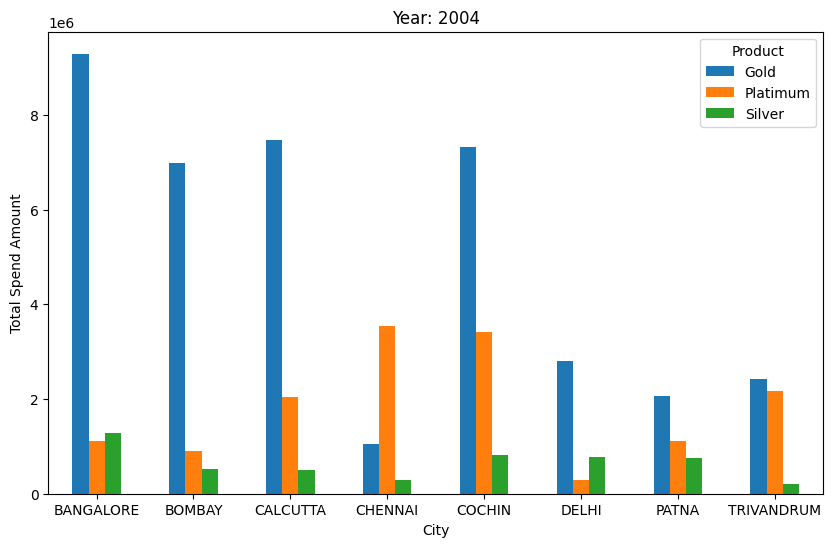

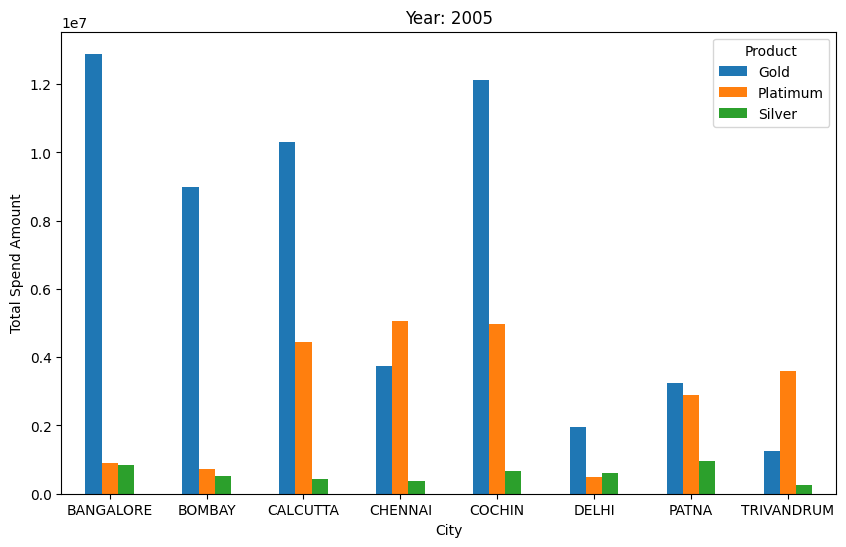

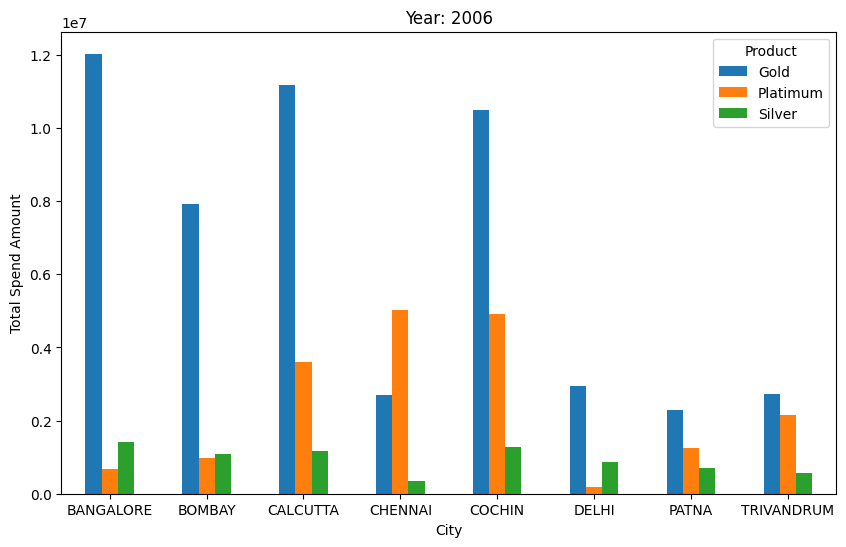

In [439]:
#Plotting the data

years = City_wise_spend_plot.index.get_level_values("Spend_Year").unique()

for year in years:
    year_data = City_wise_spend_plot.loc[year]
    x = year_data.plot(kind="bar", rot=0, figsize = (10,6))
    x.set_xlabel("City")
    x.set_ylabel("Total Spend Amount")
    x.set_title(f"Year: {year}")
    x.legend(title="Product")

plt.show()


# this will generate separate bar graph for each year i.e. 2004, 2005, 2006
# cities are shown on x axis and y axis shows amount spent and legends shows product type

### Major outcomes:

       i) BANGLORE has highest amount spent among all cities for customers having GOLD credit card.
       ii) In almost all the cities and all the years GOLD product or customes with GOLD credit card spent more.
       iii) Among all the years, year 2004 has the highest amount spent. 

### 4. Create graphs for

### a. Monthly comparison of total spends, city wise

In [401]:
# creating summary containing months, spent amount and cities:

City_monthlyspend = pd.crosstab(index = Combined_Data.Spend_Month, columns= Combined_Data.City, 
                                values= Combined_Data.Spend_Amount, aggfunc= sum)
City_monthlyspend

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Spend_Month,,,,,,,,
Apr,4207980.48,1873785.01,3457507.95,2518656.99,3882744.94,777240.75,2338179.53,1199293.45
Aug,695061.95,1066744.75,1548354.02,305875.97,2317306.61,155402.16,419383.64,453773.94
Dec,422167.24,140040.71,55001.50,223628.27,909533.05,842342.02,50000.00,640922.26
Feb,6734494.76,4276988.30,8150545.61,4385815.95,5747886.38,1494064.06,2353333.55,2857123.89
Jan,9041796.84,5948993.33,9064864.90,4466961.36,11714373.54,2714261.45,4916205.55,3704336.99
Jul,2228217.69,177726.32,2234573.27,693825.77,1290897.30,50001.50,50000.00,260484.50
Jun,1330685.90,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
Mar,5362903.07,5227850.50,4939040.04,3183643.71,5645146.53,2267149.02,1437166.61,2392316.51
May,6383115.13,3891945.60,5578246.87,2856199.62,6581085.69,1600322.07,2136586.80,2813534.48


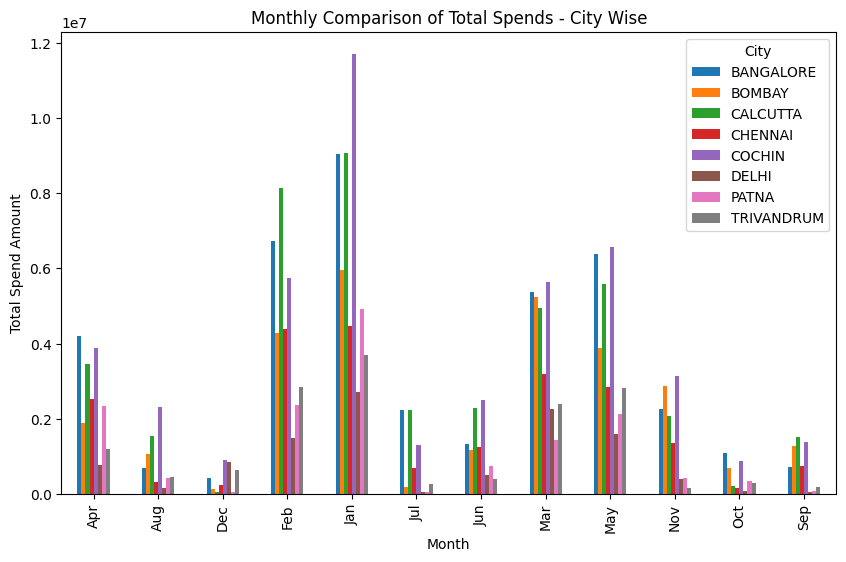

In [402]:
# create plot:

City_monthlyspend.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Comparison of Total Spends - City Wise')
plt.xlabel('Month')
plt.ylabel('Total Spend Amount')
plt.legend(title='City')
plt.show()

# combined chart showing monthly spent city wise 

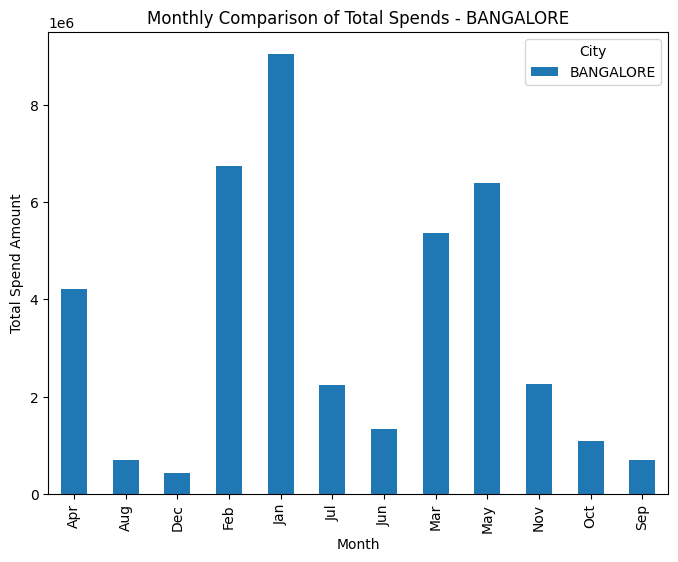

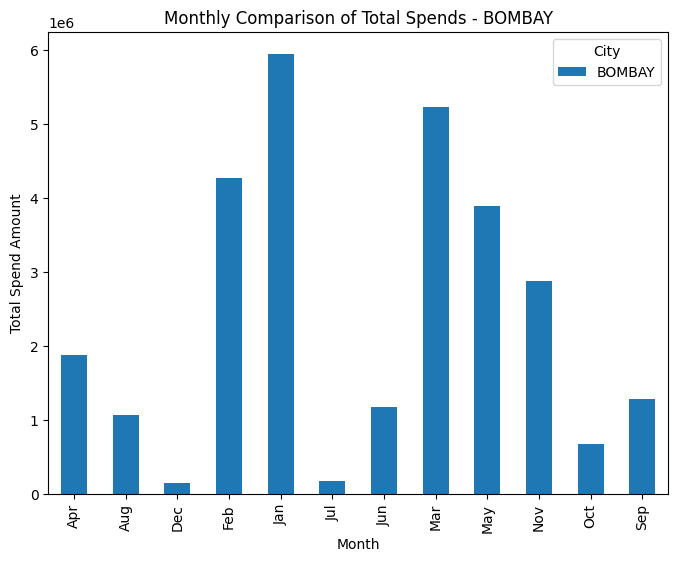

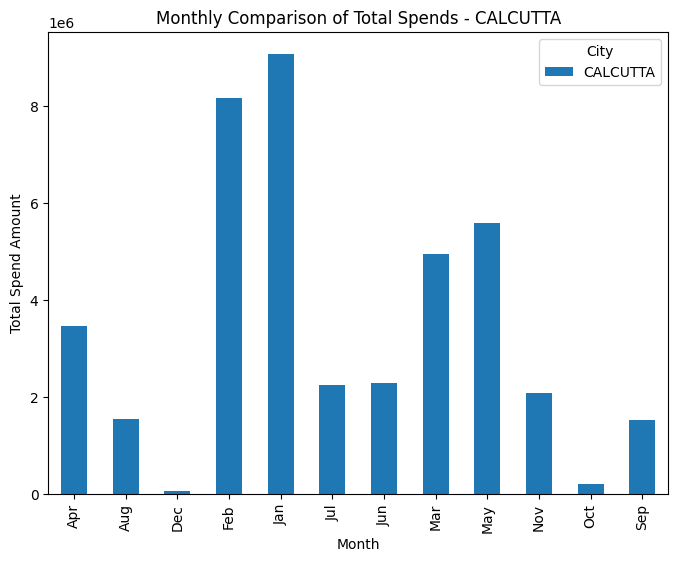

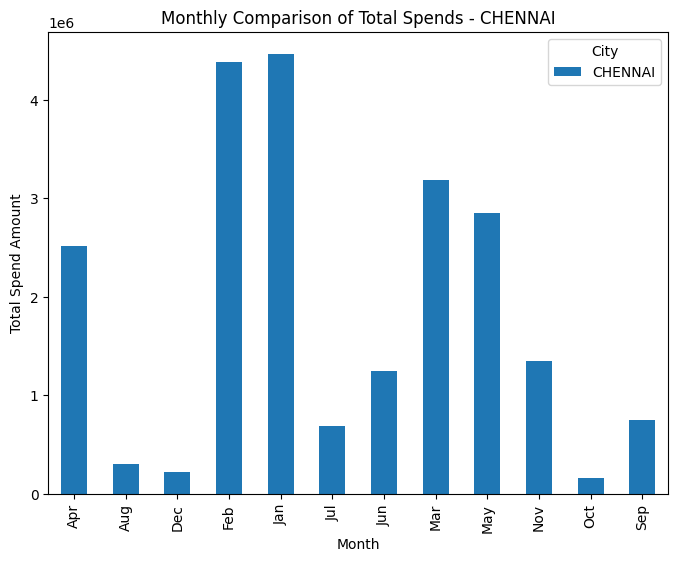

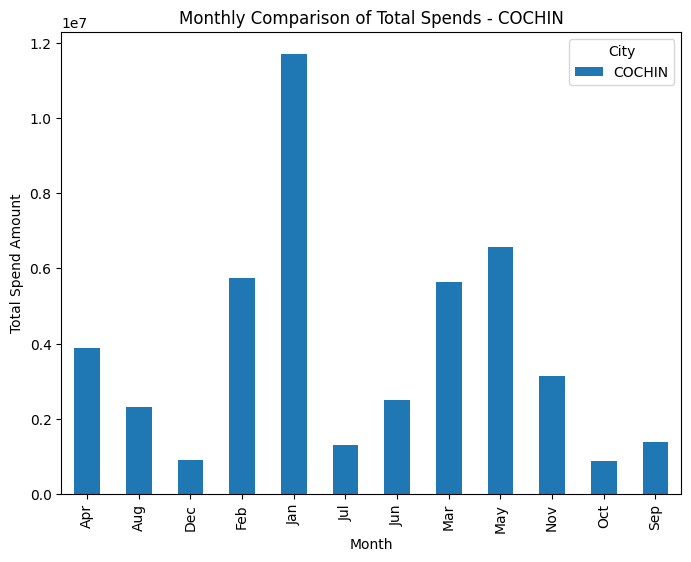

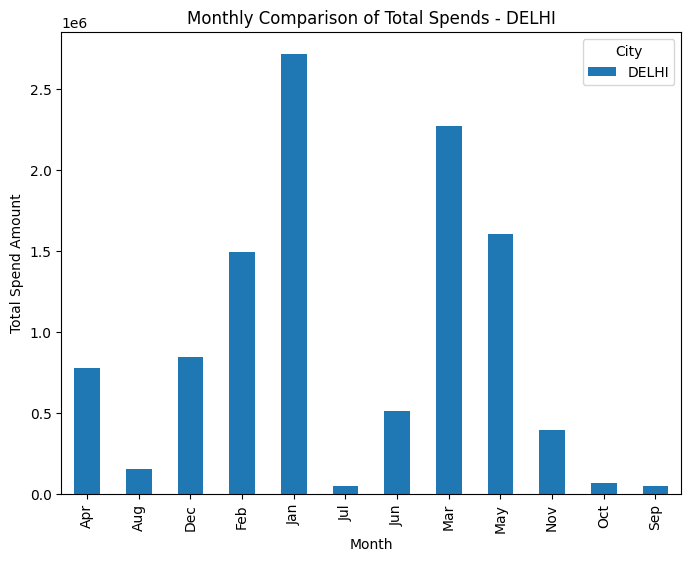

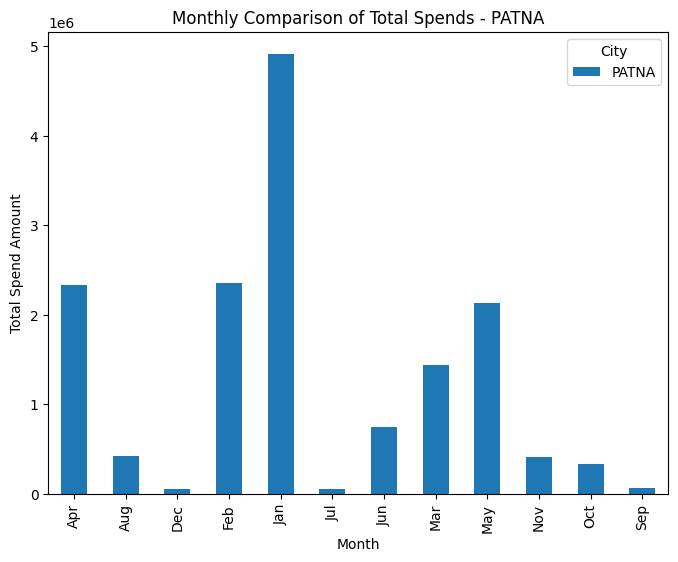

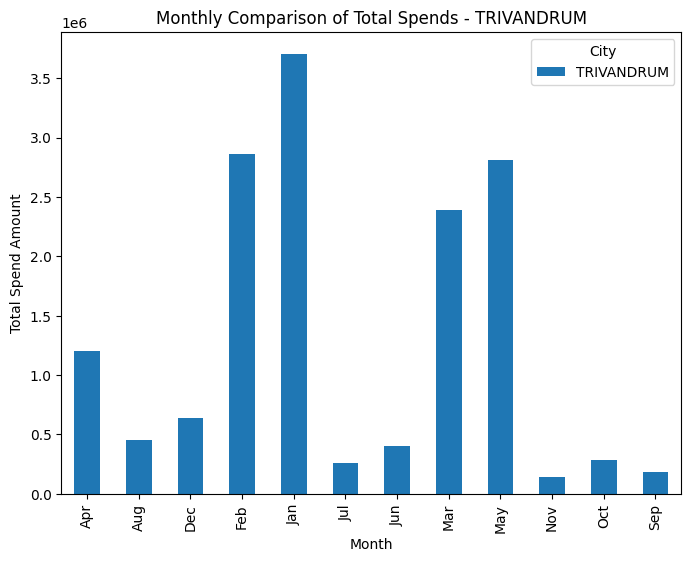

City
BANGALORE     None
BOMBAY        None
CALCUTTA      None
CHENNAI       None
COCHIN        None
DELHI         None
PATNA         None
TRIVANDRUM    None
dtype: object

In [403]:
# Separate chart for each city showing monthly spent:


# Define the UDF to create a graph for each city
def city_graph(city_spend):
    city_name = city_spend.name
    city_monthly_data = city_spend
    
    # Plot the graph
    city_monthly_data.plot(kind='bar', figsize = (8,6))
    plt.title(f'Monthly Comparison of Total Spends - {city_name}')
    plt.xlabel('Month')
    plt.ylabel('Total Spend Amount')
    plt.legend(title='City')
    plt.show()

# Apply the UDF on each city's data in the cross table

City_monthlyspend.apply(city_graph)


### For each city maximum amount spent in January AND in whole year spend was quite high in first 5 months from jan-may.

### b. Comparison of yearly spend on air tickets

In [404]:
# filter records that contains only Type: AIR TICKET

Air_Ticket_Data = Combined_Data[Combined_Data.Type == 'AIR TICKET']
Air_Ticket_Data.head()

,Customer,Spend_Date,Type,Spend_Amount,Age,City,Product,Limit,Company,Segment,Repayment_Date,Repayment_Amount,Spend_Month,Repayment_Month,Age_Group,Spend_Year
10,A11,23-Feb-05,AIR TICKET,307622.01,35.00,COCHIN,Gold,500000.0,C11,Normal Salary,23-Feb-05,208317.94,Feb,Feb,"(25, 35]",2005
29,A30,10-May-06,AIR TICKET,24399.98,25.00,BANGALORE,Gold,500000.0,C12,Govt,10-May-06,481343.32,May,May,"(15, 25]",2006
40,A41,27-May-05,AIR TICKET,359764.34,46.49,COCHIN,Platimum,500000.0,C23,Govt,27-May-05,493499.91,May,May,"(45, 55]",2005
55,A56,3-Feb-06,AIR TICKET,22463.65,60.00,CHENNAI,Platimum,500000.0,C18,Normal Salary,3-Feb-06,244372.73,Feb,Feb,"(55, 65]",2006
70,A69,17-Jan-05,AIR TICKET,5000.00,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,17-Jan-05,10000.00,Jan,Jan,"(25, 35]",2005


In [405]:
# create data summary:

yearly_air_ticket = Air_Ticket_Data.groupby('Spend_Year').Spend_Amount.sum()
yearly_air_ticket

Spend_Year
2004     4357225.35
2005    10550152.21
2006     5248469.56
Name: Spend_Amount, dtype: float64

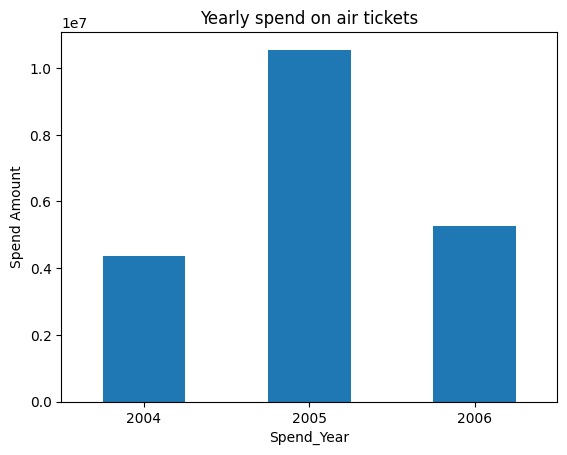

In [396]:
# plot:

yearly_air_ticket.plot(kind = 'bar')
plt.title('Yearly spend on air tickets')
plt.ylabel('Spend Amount')
plt.xticks(rotation = 0)
plt.show()


### For air tickets, in year 2005 spend amount was quite high as compared to year 2004 and 2006

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [406]:
# create summary contain months, product and spend amount:

Product_monthlyspend = pd.crosstab(index = Combined_Data.Spend_Month, columns= Combined_Data.Product, 
                                values= Combined_Data.Spend_Amount, aggfunc= sum)
Product_monthlyspend

Product,Gold,Platimum,Silver
Spend_Month,,,
Apr,13170572.59,5182493.86,1902322.65
Aug,4954030.42,1714762.80,293109.82
Dec,2332940.96,750156.19,200537.90
Feb,24779179.55,9134054.58,2087018.37
Jan,32413831.83,14951578.51,4206383.62
Jul,5167416.37,1288156.26,530153.72
Jun,6538862.64,2965712.71,689537.61
Mar,19256972.48,7288837.68,3909405.83
May,21548169.76,8151926.49,2140940.01


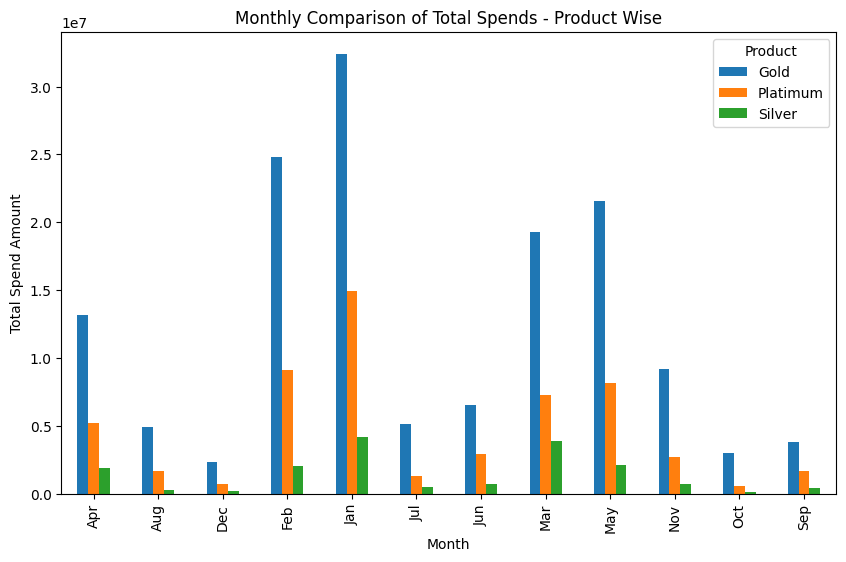

In [407]:
# create plot:

Product_monthlyspend.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Comparison of Total Spends - Product Wise')
plt.xlabel('Month')
plt.ylabel('Total Spend Amount')
plt.legend(title='Product')
plt.show()

# months on x- axis, amount spent on y axis , product as legends

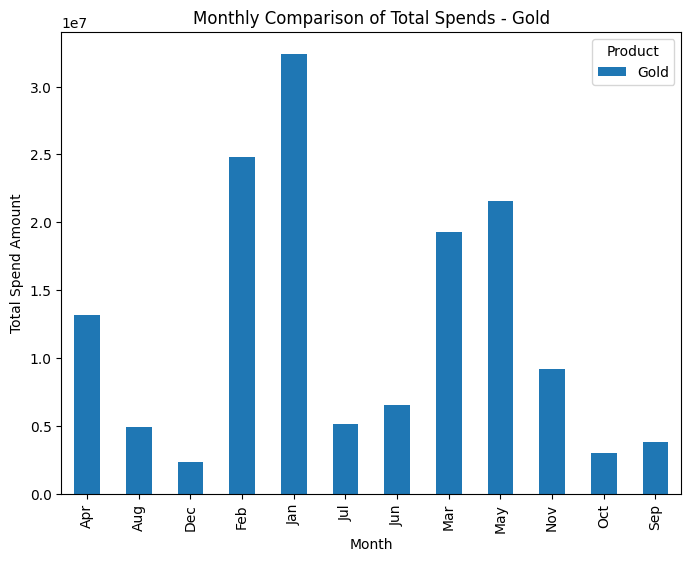

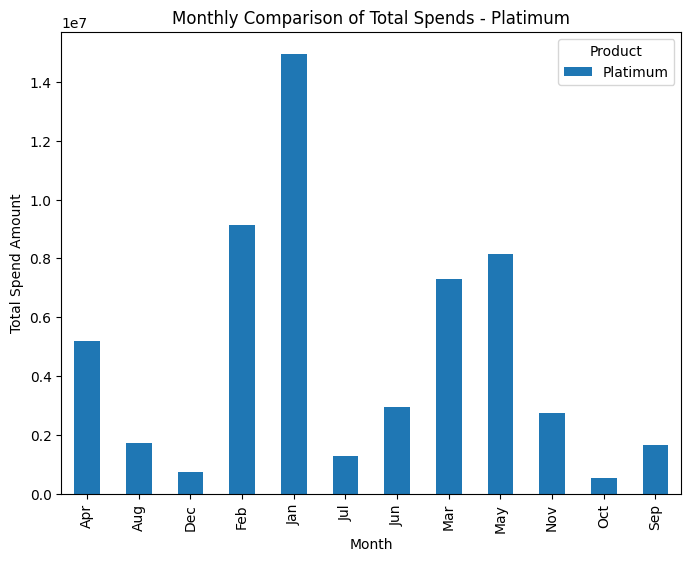

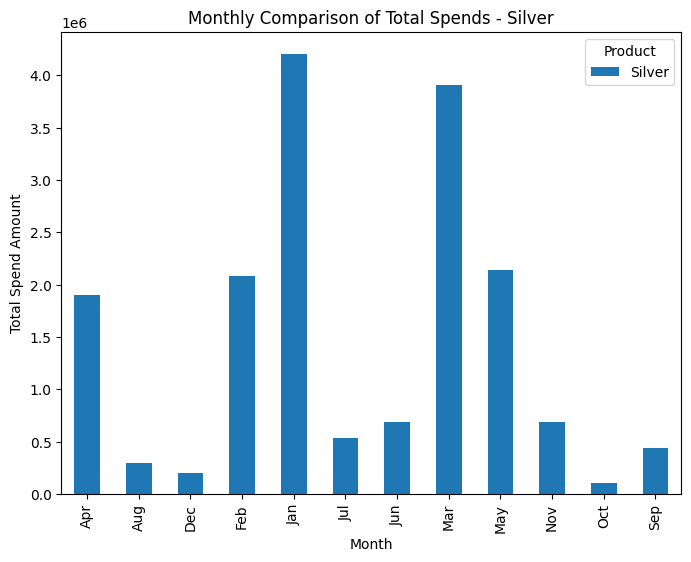

Product
Gold        None
Platimum    None
Silver      None
dtype: object

In [409]:
# Monthly trend for each product separately:

# Define the UDF to create a graph for each product
def product_graph(product_spend):
    product_name = product_spend.name
    product_monthly_data = product_spend
    
    # Plot the graph
    product_monthly_data.plot(kind='bar', figsize = (8,6))
    plt.title(f'Monthly Comparison of Total Spends - {product_name}')
    plt.xlabel('Month')
    plt.ylabel('Total Spend Amount')
    plt.legend(title='Product')
    plt.show()

# Apply the UDF on each product's data in the cross table
Product_monthlyspend.apply(product_graph)


### looking for seasonality:

     1. For all the products maximum amount is spent in the month of JANUARY.
     2. Spent amount is high for initial months and decreases as we reaches towards december.
     3. Highest spent in first 5 months of the year.
     4. Even the monthly trend is quite same for each product separately i.e. higher in initial months.
     5. Amount spent by GOLD customers was quite high as compared to platinum and silver for each month.

### 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [479]:
Combined_Data['Repayment_Year'] = pd.to_datetime(Combined_Data.Spend_Date,format= '%d-%b-%y').dt.strftime('%Y')
Combined_Data.head(3)

,Customer,Spend_Date,Type,Spend_Amount,Age,City,Product,Limit,Company,Segment,Repayment_Date,Repayment_Amount,Spend_Month,Repayment_Month,Age_Group,Spend_Year,Repayment_Year
0,A1,12-Jan-04,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,Jan,Jan,"(75, 85]",2004,2004
1,A1,3-Jan-04,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02,Jan,Jan,"(75, 85]",2004,2004
2,A1,15-Jan-04,CLOTHES,23740.46,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06,Jan,Jan,"(75, 85]",2004,2004


In [483]:
Combined_Data.Repayment_Year.value_counts()
# so we have three different repayment year i.e. 2004, 2005, 2006

2006    549
2005    532
2004    419
Name: Repayment_Year, dtype: int64

In [502]:

def top_customers_by_repayment(product, time_period):
    
    # Filter dataset based on product and time period
    filtered_data = Combined_Data[(Combined_Data['Product'] == product) & (Combined_Data['Repayment_Year'] == time_period)]

    top_customers = {}

    # Group data by city
    grouped_data = filtered_data.groupby('City')

    for city, group in grouped_data:
        # Group data by customer and calculate the total repayment amount for the city
        city_grouped_data = group.groupby('Customer')['Repayment_Amount'].sum().reset_index()

        # Sort data by repayment amount for the city
        sorted_data = city_grouped_data.sort_values(by='Repayment_Amount', ascending=False)

        # Get top 10 unique customers for the city
        top_customers[city] = sorted_data.head(10)

    return top_customers

In [523]:
### Run the UDF:


product = input("Enter the product type (Gold/Silver/Platimum): ")
time_period = input("Enter the Year (2004/2005/2006): ")

top_customers = top_customers_by_repayment(product, time_period)

# Print the top customers for each city
for city, customers in top_customers.items():
    print(f"Top customers in {city}:")
    print(customers[['Customer', 'Repayment_Amount']])
    print()




# Uers has to provide two values:
# i) Gold, Platimum , Silver which represent product (any one)
# ii) 2004, 2005, 2006 which represent repayment year (any one) 

# Output returns top 10 customers and respective repayment amount for that customer for each city

Enter the product type (Gold/Silver/Platimum): Gold
Enter the Year (2004/2005/2006): 2005
Top customers in BANGALORE:
  Customer  Repayment_Amount
1      A13        4475135.59
2      A14        4167917.29
4      A43        2842151.13
3      A30        2233330.83
0       A1        1756726.23
5      A63         788855.60

Top customers in BOMBAY:
  Customer  Repayment_Amount
0      A12        3905095.54
1      A17        2239969.49
2      A42        1575510.65
3      A62        1237528.03

Top customers in CALCUTTA:
  Customer  Repayment_Amount
4      A60        3313809.02
2      A29        2354774.78
1      A15        1542701.57
0      A10         876431.79
3      A31         621569.69

Top customers in CHENNAI:
  Customer  Repayment_Amount
0      A27        2904771.76

Top customers in COCHIN:
  Customer  Repayment_Amount
4      A61        4742996.79
3      A45        3779855.44
2      A32        1173148.88
0      A11        1071070.74
1      A16         943241.41
5      A65         23